In [2]:
import os
import pandas as pd
%matplotlib inline

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
news_api_key = os.getenv('NEWS_API_KEY')

In [5]:
# Create a newsapi client
import newsapi

news_client = newsapi.NewsApiClient(news_api_key)

In [6]:
# Fetch the Bitcoin news articles
btc_articles = news_client.get_everything(q="bitcoin")

In [7]:
# Fetch the Ethereum news articles
eth_articles = news_client.get_everything(q="ethereum")

In [8]:
# Make helper function for building dataframe
def try_analyze_content(article):
    '''
    Purpose: if an article is missing content, this function returns
    a dict with `None` values.
    '''
    try:
        text = article['content']
        feature_dict = analyzer.polarity_scores(text)
        feature_dict['text'] = text
        return feature_dict
    except AttributeError:
        return dict.fromkeys(['neg', 'neu', 'pos', 'compound', 'text'])

In [9]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = pd.DataFrame(
    [try_analyze_content(btc_articles['articles'][i])
        for i, _ in enumerate(btc_articles['articles'])]
).dropna()

# [try_analyze_content(btc_articles['articles'][i])
#         for i, _ in enumerate(btc_articles['articles'])]

btc_df.columns = ['negative', 'neutral', 'positive', 'compound', 'text']

In [10]:
# Create the ethereum sentiment scores DataFrame
eth_df = pd.DataFrame(
    [try_analyze_content(eth_articles['articles'][i])
        for i, _ in enumerate(eth_articles['articles'])]
).dropna()

eth_df.columns = ['negative', 'neutral', 'positive', 'compound', 'text']

In [11]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,negative,neutral,positive,compound
count,19.000000,19.000000,19.000000,19.000000
mean,0.253084,0.024947,0.903368,0.071632
std,0.398747,0.046209,0.050314,0.051823
min,-0.585900,0.000000,0.812000,0.000000
25%,0.000000,0.000000,0.878000,0.044000
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.029000,0.920000,0.090000
max,0.801600,0.134000,1.000000,0.188000


In [12]:
# Describe the Ethereum Sentiment
eth_df.describe()

,negative,neutral,positive,compound
count,16.000000,16.000000,16.000000,16.000000
mean,0.153006,0.023125,0.909313,0.067437
std,0.345440,0.044864,0.103058,0.087642
min,-0.445700,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.878500,0.000000
50%,0.000000,0.000000,0.928000,0.049500
75%,0.334100,0.014500,1.000000,0.086500
max,0.919800,0.148000,1.000000,0.335000


In [13]:
eth_df.iloc[0]['text']

'Editors note:Andreessen Horowitzs Crypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+2503 chars]'

### Questions:

Q: Which coin had the highest mean positive score?

A: ETH had a slightly higher mean positive.

Q: Which coin had the highest compound score?

A: ETH also had the highest (max) compound score.

Q. Which coin had the highest positive score?

A: Both had a positive high score of 1.0.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Expand the default stopwords list if necessary

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words_lower = [w.lower() for w in words]
    
    # Remove the punctuation
    punc_re = r"[^a-zA-Z ]"
    words_clean_punc = [re.sub(punc_re, '', w) for w in words_lower]
    # PL: Also get rid of empty string list items
    words_clean = [w for w in words_clean_punc if re.search(r'^[a-zA-Z]+', w)]
    
    # Remove the stop words
    words_no_SW = [w for w in words_clean if w not in stopwords.words('english')]
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in words_no_SW]
    
    return tokens


In [17]:
# Create a new tokens column for bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,negative,neutral,positive,compound,text,tokens
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...,"[jk, rowling, drinking, lot, better, believe, ..."
1,0.3182,0.000,0.933,0.067,"Yesterday, the prominent bitcoin investor Mich...","[yesterday, prominent, bitcoin, investor, mich..."
2,0.2716,0.000,0.939,0.061,"Early next week, Bitcoin is about to experienc...","[early, next, week, bitcoin, experience, third..."
3,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...,"[last, week, eye, crypto, world, glued, halven..."
4,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."


In [18]:
# Create a new tokens column for ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,negative,neutral,positive,compound,text,tokens
0,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...,"[editor, note, andreessen, horowitz, crypto, s..."
1,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
2,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...,"[use, send, ether, one, account, another, smar..."
3,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou...","[opensource, group, linux, foundation, deal, o..."
4,0.0000,0.148,0.703,0.148,With unemployment surging and businesses strug...,"[unemployment, surging, business, struggling, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
btc_df['bigrams'] = btc_df.tokens.apply(lambda text: Counter(ngrams(text, n=2)).most_common())
btc_df.bigrams

0     [((jk, rowling), 1), ((rowling, drinking), 1),...
1     [((yesterday, prominent), 1), ((prominent, bit...
2     [((early, next), 1), ((next, week), 1), ((week...
3     [((last, week), 1), ((week, eye), 1), ((eye, c...
4     [((youre, planning), 1), ((planning, protestin...
5     [((since, first), 1), ((first, bitcoin), 1), (...
6     [((ul, li), 1), ((li, cryptocurrency), 1), ((c...
8     [((li, goldman), 2), ((reuters, ul), 1), ((ul,...
9     [((ul, li), 1), ((li, famed), 1), ((famed, inv...
10    [((satoshi, nakaboto), 2), ((robot, colleague)...
11    [((move, latest), 1), ((latest, string), 1), (...
12    [((satoshi, nakaboto), 2), ((robot, colleague)...
13    [((opinion, expressed), 1), ((expressed, entre...
14    [((satoshi, nakaboto), 2), ((robot, colleague)...
15    [((satoshi, nakaboto), 2), ((robot, colleague)...
16    [((satoshi, nakaboto), 2), ((robot, colleague)...
17    [((satoshi, nakaboto), 2), ((robot, colleague)...
18    [((satoshi, nakaboto), 2), ((robot, collea

In [21]:
# Generate the Ethereum N-grams where N=2
eth_df['bigrams'] = eth_df.tokens.apply(lambda text: Counter(ngrams(text, n=2)).most_common())
eth_df.bigrams

0     [((editor, note), 1), ((note, andreessen), 1),...
1     [((developer, looking), 1), ((looking, quickly...
2     [((use, send), 1), ((send, ether), 1), ((ether...
3     [((open, source), 2), ((opensource, group), 1)...
4     [((unemployment, surging), 1), ((surging, busi...
5     [((last, week), 1), ((week, eye), 1), ((eye, c...
6     [((looking, way), 1), ((way, crypto), 1), ((cr...
7     [((ethereum, ethereum), 6), ((ethereum, cointe...
9     [((back, march), 1), ((march, put), 1), ((put,...
12    [((aiiotvraraiethereum, foundationeth), 1), ((...
13    [((ul, li), 1), ((li, cryptocurrency), 1), ((c...
14    [((cest, une), 1), ((une, innovation), 1), ((i...
15    [((google, hcl), 1), ((hcl, hcl), 1), ((hcl, g...
16    [((blockchain, technology), 1), ((technology, ...
18    [((opinion, expressed), 1), ((expressed, entre...
19    [((opinion, expressed), 1), ((expressed, entre...
Name: bigrams, dtype: object

In [22]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [52]:
# Get the top 10 words for Bitcoin
btc_string = ' '.join([' '.join(tokens) for tokens in btc_df.tokens])
btc_all_words = btc_string.split(' ')

token_count(btc_all_words)

[('bitcoin', 36),
 ('char', 19),
 ('satoshi', 16),
 ('nakaboto', 16),
 ('every', 11),
 ('li', 9),
 ('day', 9),
 ('another', 9),
 ('robot', 8),
 ('colleague', 8)]

In [53]:
# Get the top 10 words for Ethereum
eth_string = ' '.join([' '.join(tokens) for tokens in eth_df.tokens])
eth_all_words = eth_string.split(' ')

token_count(eth_all_words)

[('char', 16),
 ('ethereum', 12),
 ('crypto', 5),
 ('bitcoin', 4),
 ('blockchain', 3),
 ('li', 3),
 ('andreessen', 2),
 ('build', 2),
 ('looking', 2),
 ('platform', 2)]

In [51]:
token_count(btc_string)

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

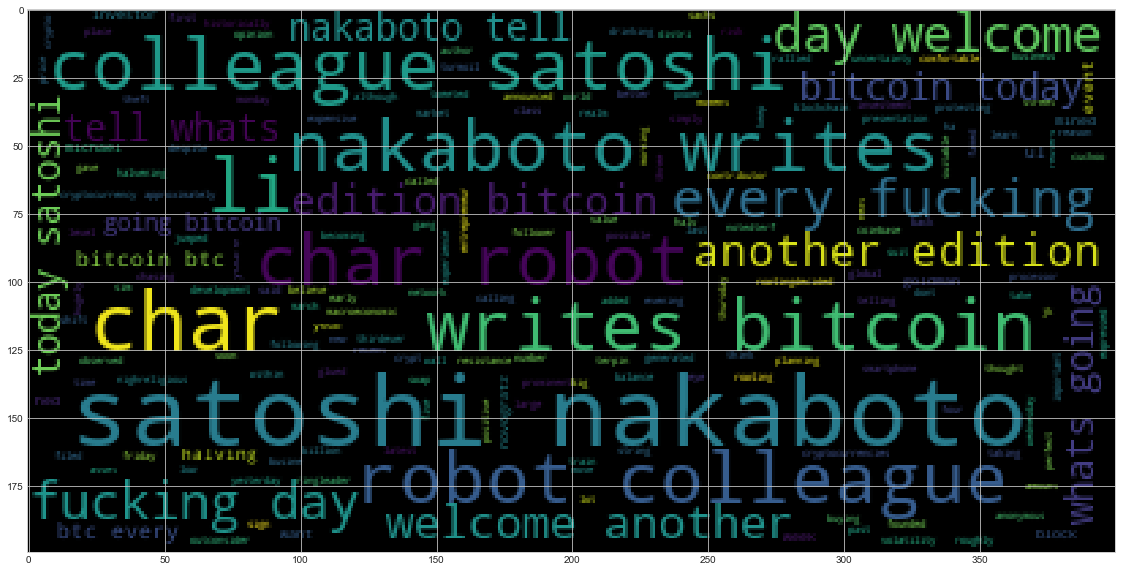

In [28]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_string)

plt.imshow(btc_wc)

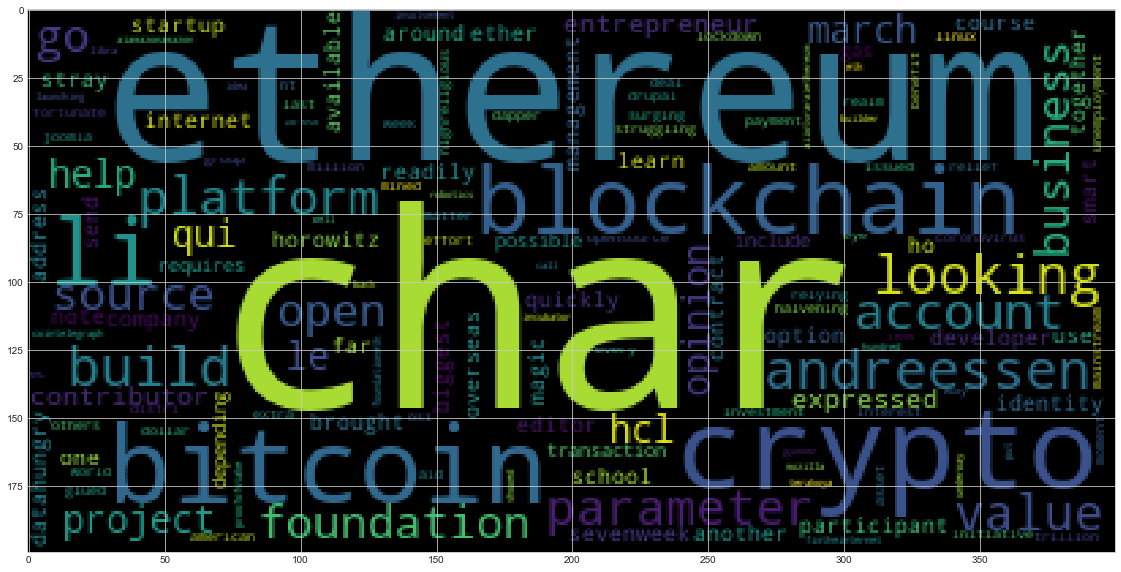

In [29]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_string)

plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [30]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [32]:
# Concatenate all of the bitcoin text together
btc_text_string = ' '.join(t for t in btc_df.text)

In [33]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text_string)

# Add a title to the document
btc_ner.user_data['title'] = "BTC NER"

In [37]:
# Render the visualization
# displacy.serve(btc_ner, style='ent')
displacy.render(btc_ner, style='ent')

In [43]:
# List all Entities
btc_ner.ents

(J.K. Rowling,
 Bitcoin,
 The Cuckoos Calling,
 Friday,
 Yesterday,
 Michael Terpin,
 SIM,
 2018,
 Early next week,
 Bitcoin,
 third,
 the last few weeks,
 blockchain,
 new bitcoin,
 first,
 Bitcoin,
 2009,
 three,
 210,000,
 every four years,
 Bitcoin,
 $13 billion,
 the past day,
 bitcoin,
 more than 6%,
 Thursday,
 Bitcoin,
 more than 100%,
 March 16,
 Reuters,
 Goldman Sachs,
 five,
 bitcoin,
 Wednesday,
 Goldman,
 Michael Novogratz,
 Monday,
 bitcoin,
 $10,000 resistance,
 Novogratz,
 Satoshi Nakaboto,
 Bitcoin,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 bitcoin,
 2012,
 Satoshi Nakaboto,
 Bitcoin,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 2020,
 a big year,
 Bitcoin,
 Satoshi Nakaboto,
 Bitcoin,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 Satoshi Nakaboto,
 Bitcoin,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 Satoshi Nakaboto,
 Bitcoin,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 Satoshi Nakaboto,
 Bitcoin,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 Sa

---

## Ethereum NER

In [38]:
# Concatenate all of the bitcoin text together
eth_text_string = ' '.join([t for t in eth_df.text])

In [39]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_text_string)

# Add a title to the document
eth_ner.user_data['title'] = "ETH NER"

In [40]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [45]:
# List all Entities
eth_ner.ents

(Andreessen,
 Crypto Startup School,
 45,
 U.S.,
 seven-week,
 Andreessen Ho,
 Ether,
 The Linux Foundation,
 Drupal Foundation,
 OSI,
 millions,
 Americans,
 $2 trillion dollar,
 Relief,
 Ec,
 the last few weeks,
 blockchain,
 new bitcoin,
 crypto,
 Dapper,
 Libra,
 Cointelegraph,
 2.0,
 Ethereum 2.0,
 2.0,
 March,
 1500,
 well over a hundred,
 the Mozilla Builders Incubator,
 Terakoya,
 2018ConsenSys,
 $13 billion,
 the past day,
 bitcoin,
 more than 6%,
 Thursday,
 Bitcoin,
 more than 100%,
 March 16,
 dun autre membre,
 un,
 Le,
 +2238,
 Blockchain,
 first,
 blockchain,
 2020,
 a big year,
 Bitcoin)